In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Achaios_Stages_Times_Sec.csv με (91, 9)
Δημιουργήθηκε dataframe για το Aigio_Stages_Times_Sec.csv με (69, 9)
Δημιουργήθηκε dataframe για το Almiros_Stages_Times_Sec.csv με (99, 9)
Δημιουργήθηκε dataframe για το Boiotias_Stages_Times_Sec.csv με (204, 9)
Δημιουργήθηκε dataframe για το Deth_Stages_Times_Sec.csv με (143, 9)
Δημιουργήθηκε dataframe για το Fthinoporino_Stages_Times_Sec.csv με (121, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_G_Stages_Times_Sec.csv με (111, 9)
Δημιουργήθηκε dataframe για το Fthiotidas_T_Stages_Times_Sec.csv με (183, 9)
Δημιουργήθηκε dataframe για το Graikas_Stages_Times_Sec.csv με (79, 9)
Δημιουργήθηκε dataframe για το Kentavros_Stages_Times_Sec.csv με (271, 9)
Δημιουργήθηκε dataframe για το Korinthou_Stages_Times_Sec.csv με (96, 9)
Δημιουργήθηκε dataframe για το Kritis_Stages_Times_Sec.csv με (188, 9)
Δημιουργήθηκε dataframe για το Livadia_Stages_Times_Sec.csv με (131, 9)
Δημιουργήθηκε dataframe για το Olympiako_Stages_Times_S

In [3]:
#total_ss_times_C6 = total.loc[(total['Gr/Cl'].str.contains('C6') & total['surface'] == 'Gravel')]
total_ss_times_C6 = total[(total['Gr/Cl'].str.contains('C6')) & (total['surface'] == 'Gravel')]
total_ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
30,Giannakopoulos,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,31,611.93
34,Englezos T. -,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,35,621.69
36,Agelis Elias,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,37,623.05
38,Gazetas Dionis,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,39,636.39
42,Pavli Marialen,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,43,650.79
...,...,...,...,...,...,...,...,...,...
179,Giokaris S. -,C6 F2,4,Stereas,4/6/2023,Gravel,Championship,28,1111.59
193,Manouskos Elia,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,14,1185.78
196,Panagiotopoulo,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82
198,Stavropoulos D,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73


In [4]:
min_value = total_ss_times_C6.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race         ss          
Boiotias     1     611.93
             2     434.69
             3     564.95
             4     424.65
Fthinoporino 1     526.33
             2    1113.28
             3     520.18
             4    1114.58
             5     744.28
Fthiotidas_G 1     853.10
             2    1429.04
             3     876.46
             4    1469.28
Graikas      1     785.51
             2     792.23
             3     791.20
Korinthou    1     522.01
             2     524.74
             3     531.49
Livadia      1     737.30
             2     689.04
             3     682.25
Olympiako    1     562.77
             2     716.37
             3     523.58
             4     713.57
             5     724.00
             6     698.92
Stereas      1     233.50
             2     842.34
             3    1201.39
             4     843.46
             5    1185.78

In [5]:
total_ss_times_F = total_ss_times_C6.merge(min_value2, on=['Race', 'ss'])
#total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['SS.'] = total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F['Crew'] = total_ss_times_F['Crew'].str[:9]
#total_ss_times_F.to_csv('greek_rallies_2023_stages_times.csv', index=False)

In [6]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,SS.,diff,diff%
0,Giannakop,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,31,611.93,611.93,01,0.00,0.000000
1,Englezos,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,35,621.69,611.93,01,9.76,1.594954
2,Agelis El,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,37,623.05,611.93,01,11.12,1.817201
3,Gazetas D,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,39,636.39,611.93,01,24.46,3.997189
4,Pavli Mar,C6 F2,1,Boiotias,5/3/2023,Gravel,cup,43,650.79,611.93,01,38.86,6.350400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Giokaris,C6 F2,4,Stereas,4/6/2023,Gravel,Championship,28,1111.59,843.46,04,268.13,31.789296
190,Manouskos,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,14,1185.78,1185.78,05,0.00,0.000000
191,Panagioto,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,17,1201.82,1185.78,05,16.04,1.352696
192,Stavropou,C6 F2,5,Stereas,4/6/2023,Gravel,Championship,19,1209.73,1185.78,05,23.95,2.019768


In [7]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_F, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)

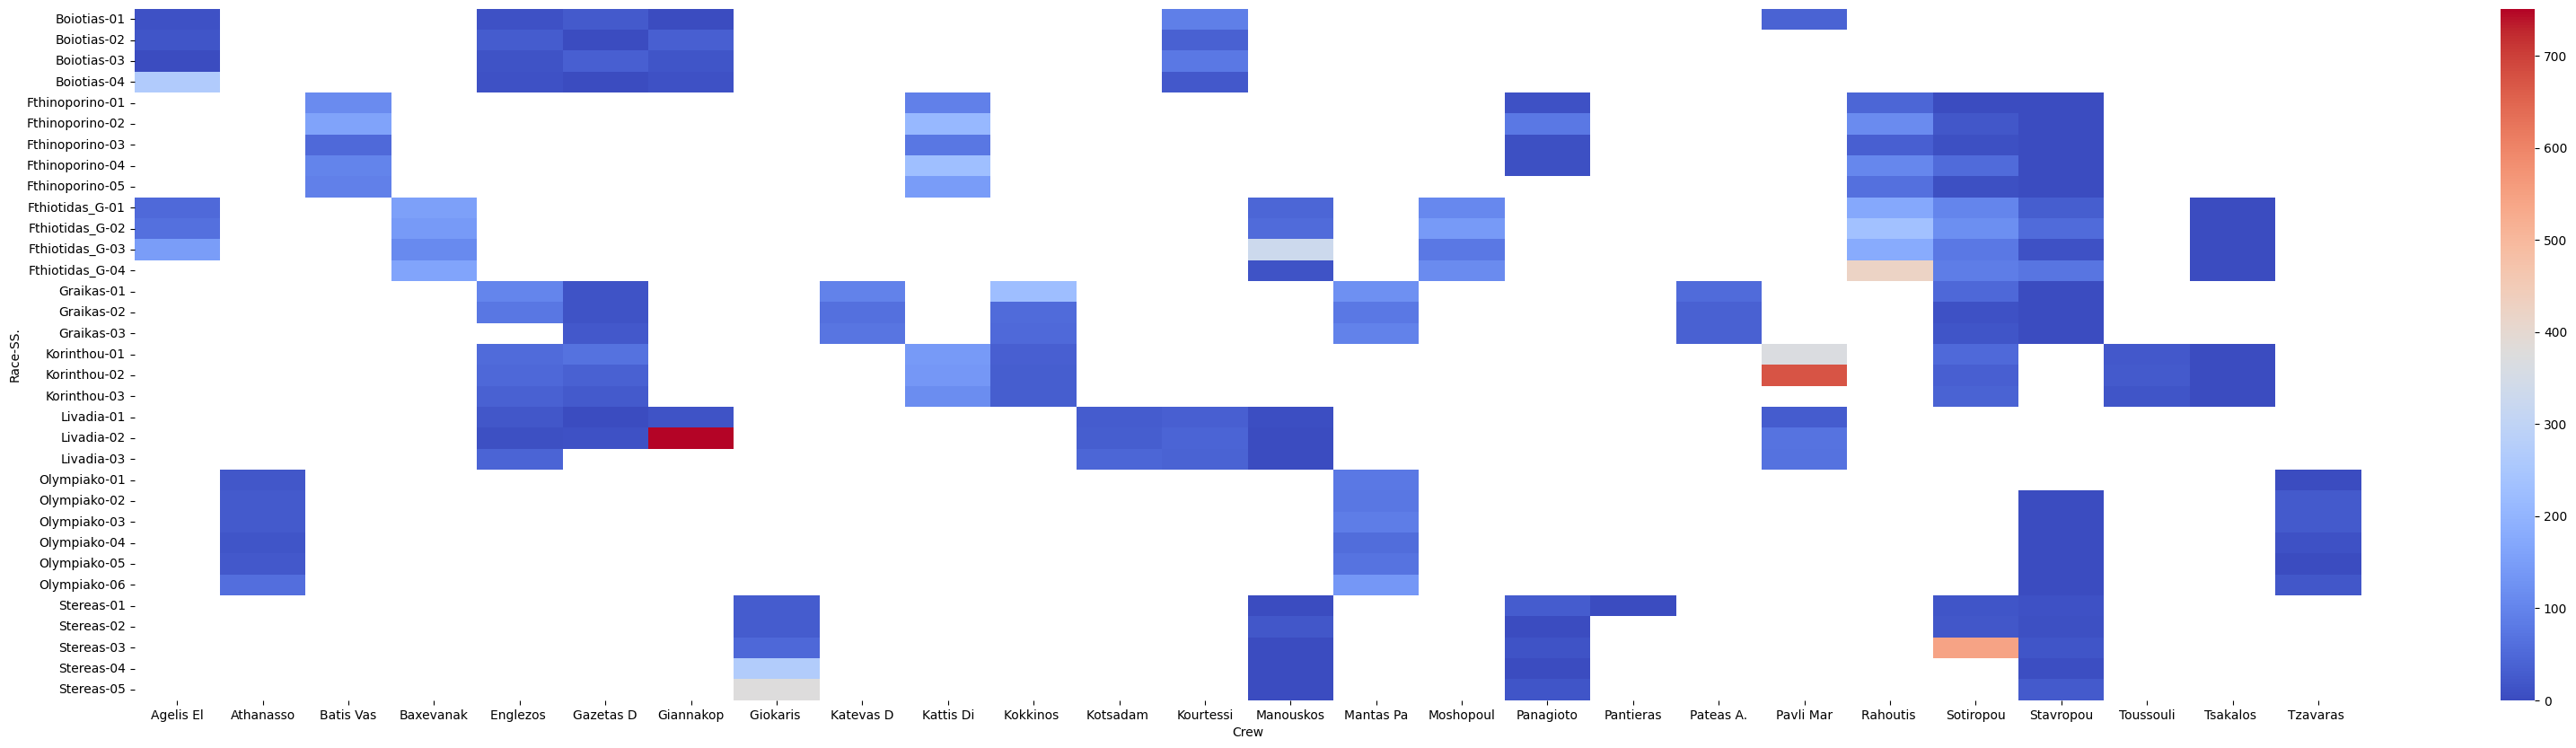

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(40,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("C6.jpg")
plt.show()

In [9]:
total_ss_times_F5 = pd.pivot_table(total_ss_times_F, values='diff', 
                                columns=['Race', 'SS.'], 
                                index='Crew', dropna=True)
total_ss_times_F6 = pd.pivot_table(total_ss_times_F, values='diff%', 
                                columns=['Race', 'SS.'], 
                                index='Crew', dropna=True)
total_ss_times_F6

Race        Boiotias                                 Fthinoporino             \
SS.               01        02         03         04           01         02   
Crew                                                                           
Agelis El   1.817201  3.473740   0.000000  62.555045          NaN        NaN   
Athanasso        NaN       NaN        NaN        NaN          NaN        NaN   
Batis Vas        NaN       NaN        NaN        NaN    21.623316  14.242598   
Baxevanak        NaN       NaN        NaN        NaN          NaN        NaN   
Englezos    1.594954  6.510387   2.198425   2.571529          NaN        NaN   
Gazetas D   3.997189  0.000000   5.814674   0.000000          NaN        NaN   
Giannakop   0.000000  7.582415   2.639172   2.630402          NaN        NaN   
Giokaris         NaN       NaN        NaN        NaN          NaN        NaN   
Katevas D        NaN       NaN        NaN        NaN          NaN        NaN   
Kattis Di        NaN       NaN        NaN        NaN    17.409230  18.829944   
Kokkinos         NaN       NaN        NaN        NaN          NaN        NaN   
Kotsadam         NaN       NaN        NaN        NaN          NaN        NaN   
Kourtessi  14.647100  8.348478  13.772900   5.244319          NaN        NaN   
Manouskos        NaN       NaN        NaN        NaN          NaN        NaN   
Mantas Pa        NaN       NaN        NaN        NaN          NaN        NaN   
Moshopoul        NaN       NaN        NaN        NaN          NaN        NaN   
Panagioto        NaN       NaN        NaN        NaN     1.806851   7.113215   
Pantieras        NaN       NaN        NaN        NaN          NaN        NaN   
Pateas A.        NaN       NaN        NaN        NaN          NaN        NaN   
Pavli Mar   6.350400       NaN        NaN        NaN          NaN        NaN   
Rahoutis         NaN       NaN        NaN        NaN     8.878460  10.202285   
Sotiropou        NaN       NaN        NaN        NaN     0.184295   1.673433   
Stavropou        NaN       NaN        NaN        NaN     0.000000   0.000000   
Toussouli        NaN       NaN        NaN        NaN          NaN        NaN   
Tsakalos         NaN       NaN        NaN        NaN          NaN        NaN   
Tzavaras         NaN       NaN        NaN        NaN          NaN        NaN   

Race                                       Fthiotidas_G  ...  Olympiako  \
SS.               03         04         05           01  ...         02   
Crew                                                     ...              
Agelis El        NaN        NaN        NaN     6.008674  ...        NaN   
Athanasso        NaN        NaN        NaN          NaN  ...   3.579156   
Batis Vas   9.735092   8.735129  12.483205          NaN  ...        NaN   
Baxevanak        NaN        NaN        NaN    18.152620  ...        NaN   
Englezos         NaN        NaN        NaN          NaN  ...        NaN   
Gazetas D        NaN        NaN        NaN          NaN  ...        NaN   
Giannakop        NaN        NaN        NaN          NaN  ...        NaN   
Giokaris         NaN        NaN        NaN          NaN  ...        NaN   
Katevas D        NaN        NaN        NaN          NaN  ...        NaN   
Kattis Di  14.229690  20.413968  19.543720          NaN  ...        NaN   
Kokkinos         NaN        NaN        NaN          NaN  ...        NaN   
Kotsadam         NaN        NaN        NaN          NaN  ...        NaN   
Kourtessi        NaN        NaN        NaN          NaN  ...        NaN   
Manouskos        NaN        NaN        NaN     5.178760  ...        NaN   
Mantas Pa        NaN        NaN        NaN          NaN  ...  10.469450   
Moshopoul        NaN        NaN        NaN    12.513187  ...        NaN   
Panagioto   1.355300   0.729423        NaN          NaN  ...        NaN   
Pantieras        NaN        NaN        NaN          NaN  ...        NaN   
Pateas A.        NaN        NaN        NaN          NaN  ...        NaN   
Pavli Mar        NaN        N

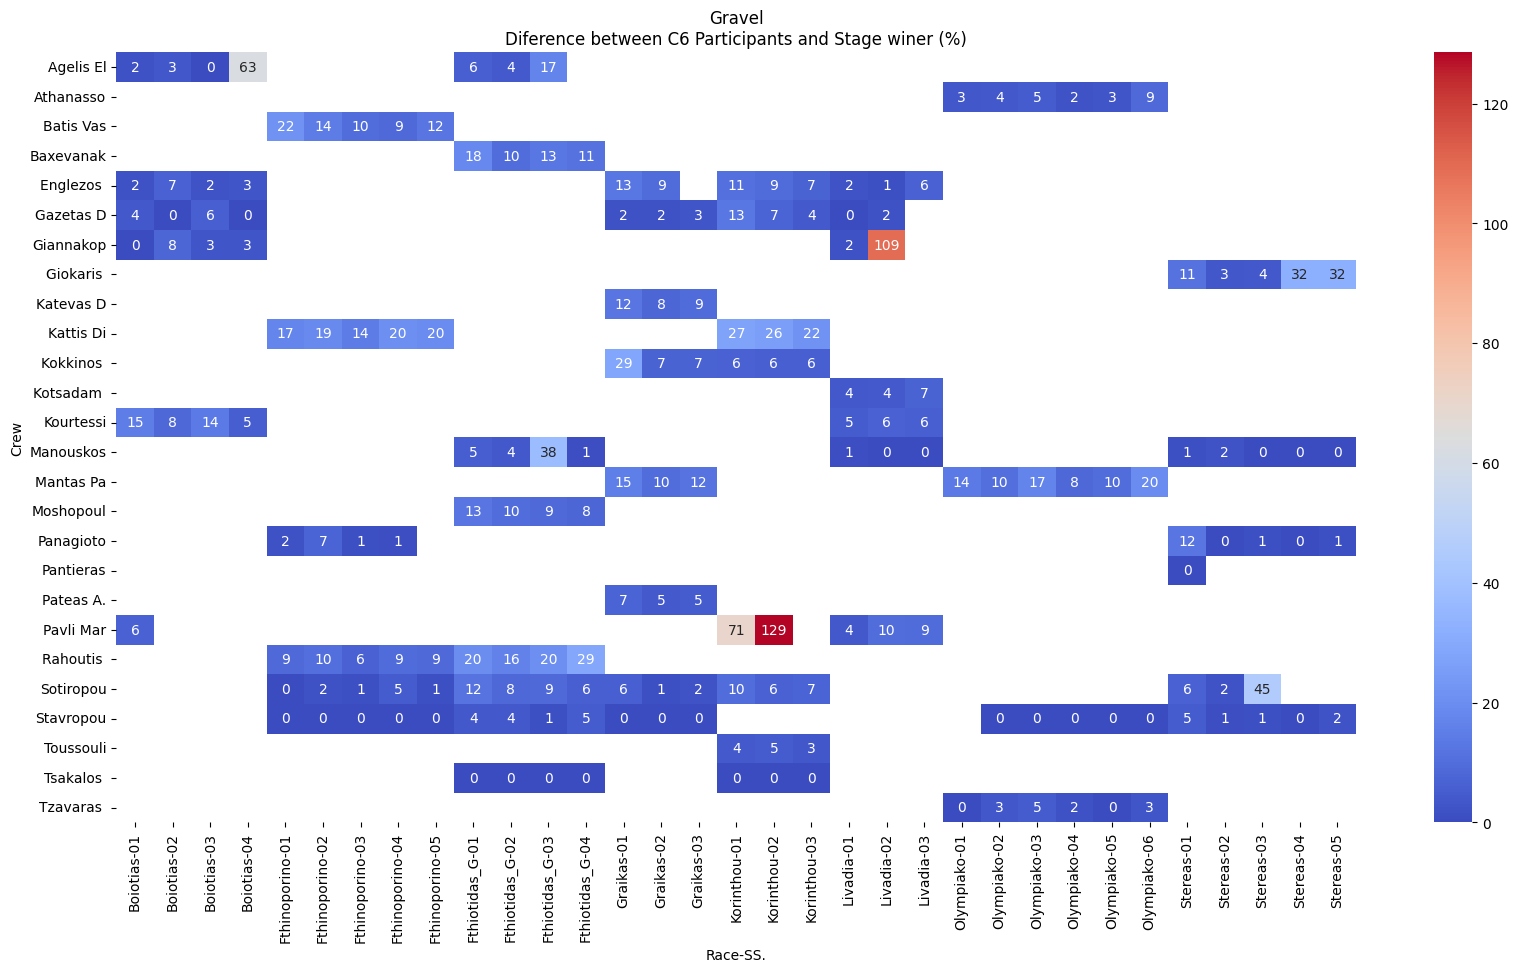

In [10]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F5, cmap='coolwarm', cbar=False)
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
#plt.savefig("C6_2.jpg")

fig.set_size_inches(20,10)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL_2 = sns.heatmap(total_ss_times_F6, annot=True, fmt=',.0f',cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.title('Gravel' +'\nDiference between C6 Participants and Stage winer (%)')
plt.savefig("C6_Grave.jpg")
plt.show()